# Author: Aaron Bone

Version: 1.0

Semester: Spring 2021

Summary:

In this project we explore an independently found dataset in order to utilize tools learned previously in class. This dataset goes over the future 50 independent restaurants predicted by 2019.

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

First Steps

In [173]:
f50 = pd.read_csv("Future50.csv")
df.head()

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising
0,1,Evergreens,"Seattle, Wash.",24,130.5%,26,116.7%,1150,No
1,2,Clean Juice,"Charlotte, N.C.",44,121.9%,105,94.4%,560,Yes
2,3,Slapfish,"Huntington Beach, Calif.",21,81.0%,21,90.9%,1370,Yes
3,4,Clean Eatz,"Wilmington, N.C.",25,79.7%,46,58.6%,685,Yes
4,5,Pokeworks,"Irvine, Calif.",49,77.1%,50,56.3%,1210,Yes


Lets do a check to see how much data is missing.

<AxesSubplot:>

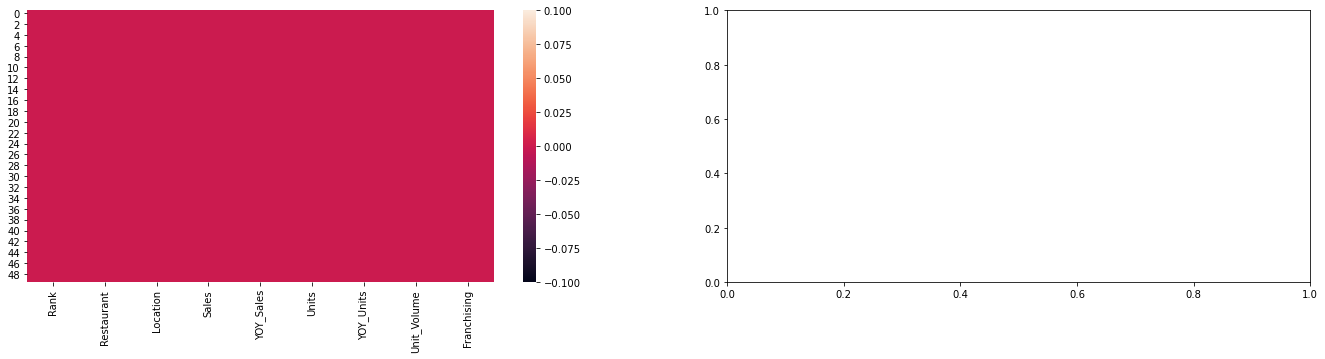

In [174]:
fig, ax = plt.subplots(1,2, figsize=(23,5))
sns.heatmap(f50.isnull(), ax=ax[0])

In [175]:
f50.head(5)

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising
0,1,Evergreens,"Seattle, Wash.",24,130.5%,26,116.7%,1150,No
1,2,Clean Juice,"Charlotte, N.C.",44,121.9%,105,94.4%,560,Yes
2,3,Slapfish,"Huntington Beach, Calif.",21,81.0%,21,90.9%,1370,Yes
3,4,Clean Eatz,"Wilmington, N.C.",25,79.7%,46,58.6%,685,Yes
4,5,Pokeworks,"Irvine, Calif.",49,77.1%,50,56.3%,1210,Yes


We're going to clean this dataset by removing the special characters from YOY_Sales and YOY_Units

In [176]:
f50['YOY_Sales'] = f50['YOY_Sales'].str.replace('%', '').astype(float)
f50['YOY_Units'] = f50['YOY_Units'].str.replace('%', '').astype(float)
f50.rename(columns={'YOY_Sales':'YOY_Sales (%)', 'YOY_Units':'YOY_Units (%)'}, inplace=True)
f50.head(5)

,Rank,Restaurant,Location,Sales,YOY_Sales (%),Units,YOY_Units (%),Unit_Volume,Franchising
0,1,Evergreens,"Seattle, Wash.",24,130.5,26,116.7,1150,No
1,2,Clean Juice,"Charlotte, N.C.",44,121.9,105,94.4,560,Yes
2,3,Slapfish,"Huntington Beach, Calif.",21,81.0,21,90.9,1370,Yes
3,4,Clean Eatz,"Wilmington, N.C.",25,79.7,46,58.6,685,Yes
4,5,Pokeworks,"Irvine, Calif.",49,77.1,50,56.3,1210,Yes


We can also seperate the Location column into 2 new columns, "City" and "State"

In [177]:
f50['City'] = f50['Location'].str.split(',', expand=True)[0].str.strip()
f50['State'] = f50['Location'].str.split(',', expand=True)[1].str.strip()
f50.drop(['Location'], axis=1, inplace=True)
f50.head(5)

,Rank,Restaurant,Sales,YOY_Sales (%),Units,YOY_Units (%),Unit_Volume,Franchising,City,State
0,1,Evergreens,24,130.5,26,116.7,1150,No,Seattle,Wash.
1,2,Clean Juice,44,121.9,105,94.4,560,Yes,Charlotte,N.C.
2,3,Slapfish,21,81.0,21,90.9,1370,Yes,Huntington Beach,Calif.
3,4,Clean Eatz,25,79.7,46,58.6,685,Yes,Wilmington,N.C.
4,5,Pokeworks,49,77.1,50,56.3,1210,Yes,Irvine,Calif.


Oh, by the way Joella's Hot Chicken in town is actually on this list, #10.

In [178]:
f50.head(10)

,Rank,Restaurant,Sales,YOY_Sales (%),Units,YOY_Units (%),Unit_Volume,Franchising,City,State
0,1,Evergreens,24,130.5,26,116.7,1150,No,Seattle,Wash.
1,2,Clean Juice,44,121.9,105,94.4,560,Yes,Charlotte,N.C.
2,3,Slapfish,21,81.0,21,90.9,1370,Yes,Huntington Beach,Calif.
3,4,Clean Eatz,25,79.7,46,58.6,685,Yes,Wilmington,N.C.
4,5,Pokeworks,49,77.1,50,56.3,1210,Yes,Irvine,Calif.
5,6,Playa Bowls,39,62.9,76,28.8,580,Yes,Belmar,N.J.
6,7,The Simple Greek,24,52.5,36,33.3,775,Yes,Blue Bell,Pa.
7,8,Melt Shop,20,39.6,19,35.7,1260,Yes,New York,N.Y.
8,9,Creamistry,24,36.8,60,27.7,465,Yes,Yorba Linda,Calif.
9,10,Joella's Hot Chicken,29,35.5,17,30.8,1930,No,Louisville,Ky.


To get a general description of the data:

In [179]:
f50['Sales'].describe()

count    50.000000
mean     33.780000
std       9.596534
min      20.000000
25%      24.250000
50%      34.500000
75%      42.000000
max      49.000000
Name: Sales, dtype: float64

In [180]:
f50['YOY_Sales (%)'].describe()

count     50.000000
mean      33.698000
std       24.549205
min       14.400000
25%       20.900000
50%       25.500000
75%       33.825000
max      130.500000
Name: YOY_Sales (%), dtype: float64

In [181]:
f50['Units'].describe()

count     50.000000
mean      34.700000
std       24.527577
min        7.000000
25%       16.000000
50%       27.000000
75%       45.500000
max      105.000000
Name: Units, dtype: float64

In [182]:
f50['YOY_Units (%)'].describe()

count     50.000000
mean      27.446000
std       23.231051
min        4.000000
25%       14.300000
50%       19.900000
75%       32.675000
max      116.700000
Name: YOY_Units (%), dtype: float64

In [183]:
f50['Unit_Volume'].describe()

count      50.00000
mean     1592.60000
std       994.67677
min       465.00000
25%       867.50000
50%      1260.00000
75%      2020.00000
max      4300.00000
Name: Unit_Volume, dtype: float64

In [184]:
f50['Franchising'].describe()

count      50
unique      2
top       Yes
freq       29
Name: Franchising, dtype: object

In [185]:
f50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           50 non-null     int64  
 1   Restaurant     50 non-null     object 
 2   Sales          50 non-null     int64  
 3   YOY_Sales (%)  50 non-null     float64
 4   Units          50 non-null     int64  
 5   YOY_Units (%)  50 non-null     float64
 6   Unit_Volume    50 non-null     int64  
 7   Franchising    50 non-null     object 
 8   City           50 non-null     object 
 9   State          50 non-null     object 
dtypes: float64(2), int64(4), object(4)
memory usage: 4.0+ KB


Restaurant Group By:

In [186]:
f50['Restaurant'].groupby(f50['Restaurant']).count().sort_values()

Restaurant
&pizza                              1
Maple Street Biscuit Co.            1
Melt Shop                           1
Original ChopShop                   1
Pita Mediterranean Street Food      1
Playa Bowls                         1
Pokeworks                           1
Quickway Japanese Hibachi           1
Rapid Fired Pizza                   1
Slapfish                            1
Spitz Mediterranean Street Food     1
StoneFire Grill                     1
Sugarfire Smokehouse                1
Super Duper Burgers                 1
Surcheros                           1
Tacos 4 Life                        1
Teriyaki Madness                    1
The Flying Biscuit Cafe             1
The Human Bean                      1
The Little Beet                     1
The Lost Cajun                      1
The Pizza Press                     1
LA Crawfish                         1
Just Salad                          1
Joella's Hot Chicken                1
Joe & The Juice                     1
B

In [187]:
f50['City'].groupby(f50['City']).count().sort_values()

City
Agoura Hills        1
Mechanicsburg       1
Medford             1
Memphis             1
Olivette            1
Omaha               1
Orange Park         1
Orlando             1
Pasadena            1
Plano               1
San Ramon           1
Scottsdale          1
Seattle             1
Spartanburg         1
Wall Township       1
Washington          1
Wilmington          1
Louisville          1
McAllen             1
Kettering           1
Anaheim             1
Atlanta             1
Belmar              1
Blue Bell           1
Conway              1
Los Angeles         1
Doral               1
Denver              1
Fairburn            1
Fairfax             1
Frisco              1
Huntington Beach    1
Irvine              1
Douglas             1
Yorba Linda         1
San Francisco       2
Charlotte           2
Columbus            3
New York            8
Name: City, dtype: int64

In [188]:
f50['State'].groupby(f50['State']).count().sort_values()

State
Ariz.      1
Tenn.      1
S.C.       1
Ore.       1
Neb.       1
Va.        1
Mo.        1
Wash.      1
D.C.       1
Colo.      1
Ark.       1
Ky.        1
Pa.        2
N.J.       2
Ga.        3
N.C.       3
Fla.       3
Texas      3
Ohio       4
N.Y.       8
Calif.    10
Name: State, dtype: int64

In [189]:
f50['Franchising'].groupby(f50['Franchising']).count().sort_values()

Franchising
No     21
Yes    29
Name: Franchising, dtype: int64

Making the Correlation Table and Heatmap:

In [ ]:
f50.corr()

<AxesSubplot:>

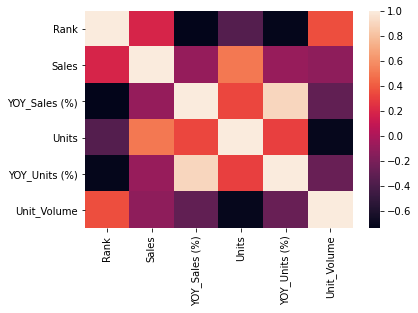

In [191]:
sns.heatmap(f50.corr())

Getting Distributions:

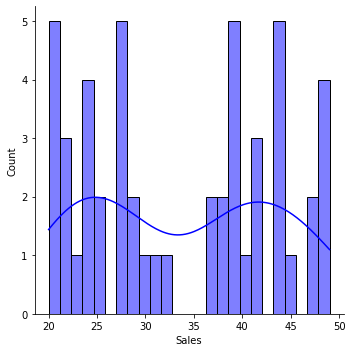

In [192]:
sns.displot(f50.Sales,color='blue', bins=25,kde=True)

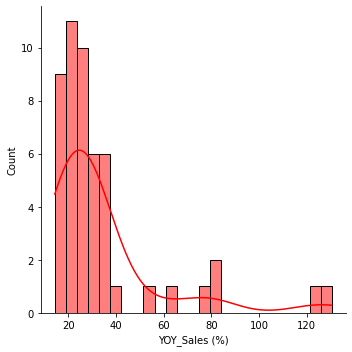

In [193]:
sns.displot(f50['YOY_Sales (%)'],color='red', bins=25,kde=True)

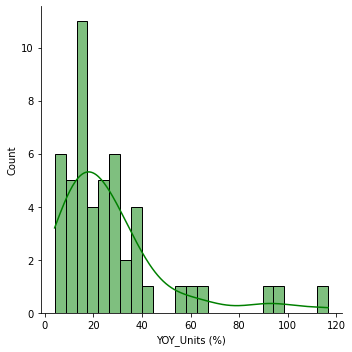

In [194]:
sns.displot(f50['YOY_Units (%)'],color='green', bins=25,kde=True)

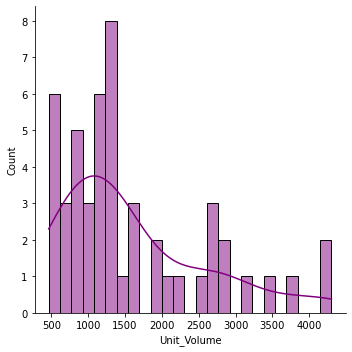

In [195]:
sns.displot(f50['Unit_Volume'],color='purple', bins=25,kde=True)

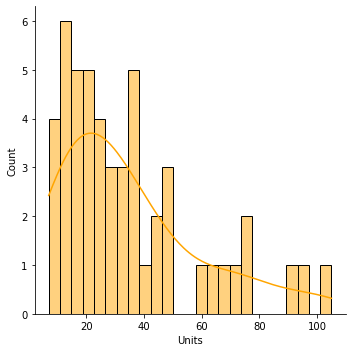

In [196]:
sns.displot(f50['Units'],color='orange', bins=25,kde=True)

Forming a scattplot showcasing YOY_Sales/Units in Franchises vs Non-Franchises.

In [197]:
franchise = f50.query("Franchising == 'Yes'")
notfranchise = f50.query("Franchising == 'No'")

<AxesSubplot:xlabel='YOY_Sales (%)', ylabel='YOY_Units (%)'>

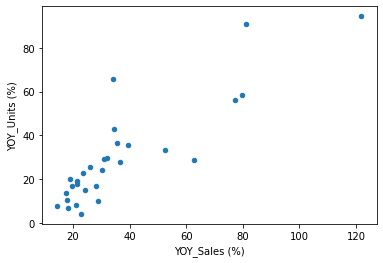

In [198]:
franchise.plot.scatter(x="YOY_Sales (%)",y="YOY_Units (%)")

<AxesSubplot:xlabel='YOY_Sales (%)', ylabel='YOY_Units (%)'>

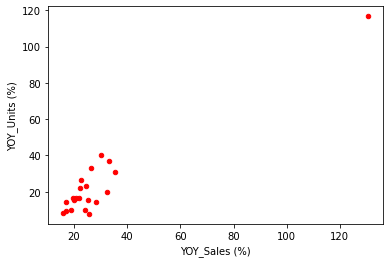

In [199]:
notfranchise.plot.scatter(x="YOY_Sales (%)",y="YOY_Units (%)", color='red')

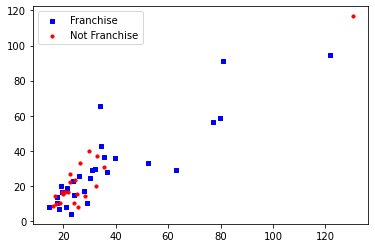

In [200]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)

ax1.scatter(franchise['YOY_Sales (%)'], franchise['YOY_Units (%)'],s=10, c='b', marker="s", label='Franchise')
ax1.scatter(notfranchise['YOY_Sales (%)'],notfranchise['YOY_Units (%)'], s=10, c='r', marker="o", label='Not Franchise')
plt.legend(loc='upper left');
plt.show()

Scattplot of Sales vs Units

<AxesSubplot:xlabel='Sales', ylabel='Units'>

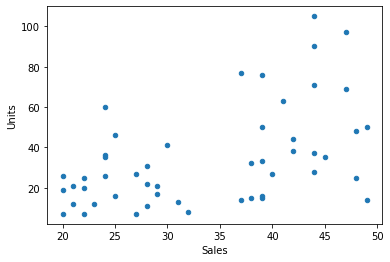

In [223]:
f50.plot.scatter(x="Sales",y="Units")

Sales Boxplot

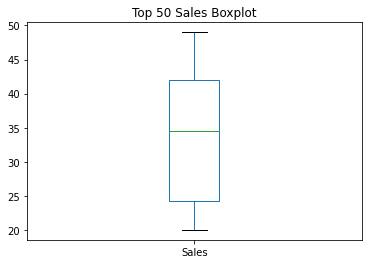

In [206]:
bxt = f50.boxplot(column = 'Sales')
bxt.set_title('Top 50 Sales Boxplot')
bxt.grid(False)

State and City Bargraphs

In [207]:
statepop = f50['State'].groupby(f50['State']).count()
statepop

State
Ariz.      1
Ark.       1
Calif.    10
Colo.      1
D.C.       1
Fla.       3
Ga.        3
Ky.        1
Mo.        1
N.C.       3
N.J.       2
N.Y.       8
Neb.       1
Ohio       4
Ore.       1
Pa.        2
S.C.       1
Tenn.      1
Texas      3
Va.        1
Wash.      1
Name: State, dtype: int64

<AxesSubplot:xlabel='States', ylabel='Number of Restaurants'>

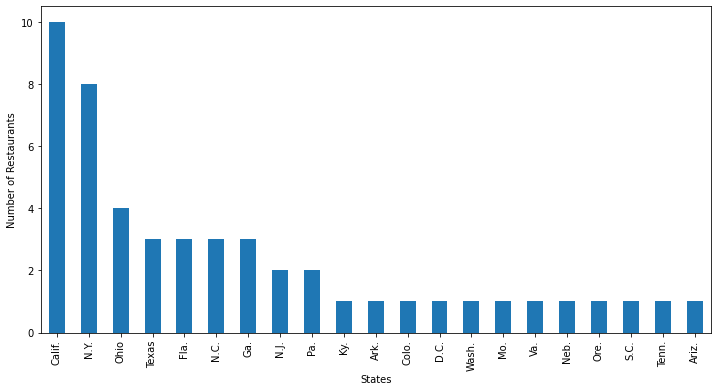

In [211]:
statepop.sort_values(ascending=False).plot(kind="bar",xlabel="States",ylabel='Number of Restaurants',figsize=(12,6))

In [220]:
citypop = f50['City'].groupby(f50['City']).count()
citypop

City
Agoura Hills        1
Anaheim             1
Atlanta             1
Belmar              1
Blue Bell           1
Charlotte           2
Columbus            3
Conway              1
Denver              1
Doral               1
Douglas             1
Fairburn            1
Fairfax             1
Frisco              1
Huntington Beach    1
Irvine              1
Kettering           1
Los Angeles         1
Louisville          1
McAllen             1
Mechanicsburg       1
Medford             1
Memphis             1
New York            8
Olivette            1
Omaha               1
Orange Park         1
Orlando             1
Pasadena            1
Plano               1
San Francisco       2
San Ramon           1
Scottsdale          1
Seattle             1
Spartanburg         1
Wall Township       1
Washington          1
Wilmington          1
Yorba Linda         1
Name: City, dtype: int64

<AxesSubplot:xlabel='Cities', ylabel='Number of Restaurants'>

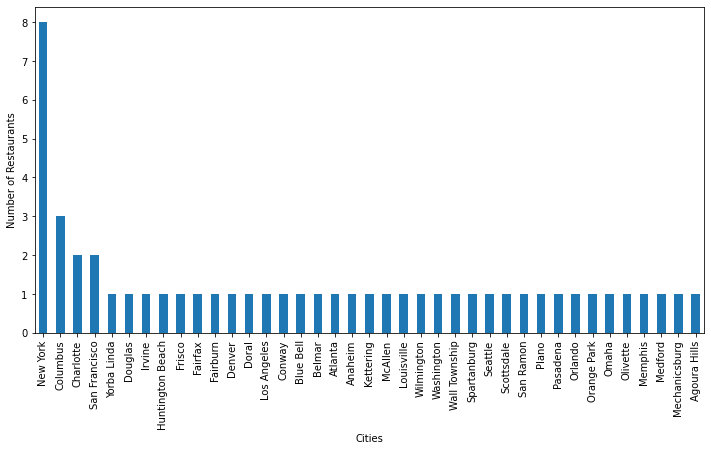

In [221]:
citypop.sort_values(ascending=False).plot(kind="bar",xlabel="Cities",ylabel='Number of Restaurants',figsize=(12,6))

Pie Chart:

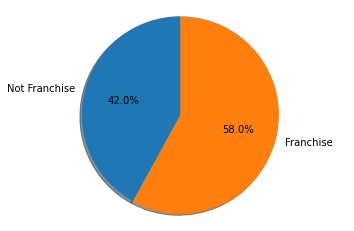

In [219]:
franch=f50['Franchising'].groupby(f50['Franchising']).count().sort_values()
labellist = 'Not Franchise', 'Franchise'
fig2, ax1 = plt.subplots()
ax1.pie(franch,labels=labellist,autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()